# <b>Data 102 Final Project Code</b>

### <u>Import Necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import multivariate_normal, norm, uniform
from scipy.stats import poisson, norm, gamma
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

### Read in Datasets

In [2]:
dem = pd.read_csv('dem_candidates.csv')
dem['Party'] = 'Democratic'
rep = pd.read_csv('rep_candidates.csv', encoding='latin-1')
rep['Party'] = 'Republican'
candidate_FEC = pd.read_csv('candidate_summary_2018.csv')

## Combining Datasets

### Combining Democrat and Republican Data

In [3]:
combined = pd.concat([dem, rep])

combined['Candidate New'] = combined['Candidate'].str.replace(r'\s*\([^)]*\)|\s*".*?"', '', regex=True)
combined['Candidate New'] = combined['Candidate New'].str.upper()
combined = combined.drop('Candidate', axis=1)
combined.head()

,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,Primary %,...,NRA Endorsed?,Right to Life Endorsed?,Susan B. Anthony Endorsed?,Club for Growth Endorsed?,Koch Support?,House Freedom Support?,Tea Party Endorsed?,Main Street Endorsed?,Chamber Endorsed?,Candidate New
0,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,3.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ANTHONY WHITE
1,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,1.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHRISTOPHER COUNTRYMAN
2,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,3.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOUG SMITH
3,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,8.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JAMES C. FIELDS
4,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,28.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUE BELL COBB


### Reading in Federal Election Commission Data

In [4]:
candidate_FEC['Candidate'] = candidate_FEC['Cand_Name'].str.replace(r'(\w+), (\w+)', r'\2 \1', regex=True)
candidate_FEC = candidate_FEC.drop('Cand_Name', axis=1)
candidate_FEC = candidate_FEC[['Candidate', 'Cand_Id', 'Total_Contribution', 
                               'Cand_Party_Affiliation', 'Cand_State', 'Transfer_From_Other_Auth_Committee']]
candidate_FEC.head()

,Candidate,Cand_Id,Total_Contribution,Cand_Party_Affiliation,Cand_State,Transfer_From_Other_Auth_Committee
0,KEN ASHBY,H8TX05052,0.00,LIB,TX,0.0
1,DON ECKHART ELIJAH,S6OH00288,0.00,REP,OH,0.0
2,MICHAEL ZIESING VINCENT,S8CA00499,0.00,GRE,CA,0.0
3,ALBIO SIRES,H6NJ13191,459857.05,DEM,NJ,0.0
4,DOUGLAS SMITH MARK MR. JR.,H6MI03172,0.00,IND,MI,0.0


### Merge all data into one consolidated dataset

In [5]:
total_df = combined.merge(candidate_FEC, left_on='Candidate New', right_on='Candidate')
total_df = total_df.drop('Candidate New', axis=1)
total_df.head()

,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,Primary %,...,House Freedom Support?,Tea Party Endorsed?,Main Street Endorsed?,Chamber Endorsed?,Candidate,Cand_Id,Total_Contribution,Cand_Party_Affiliation,Cand_State,Transfer_From_Other_Auth_Committee
0,AL,U.S. House Alabama District 1,Representative,Regular,6/5/18,Advanced,None,On the Ballot,-30.680000,80.769997,...,NaN,NaN,NaN,NaN,ROBERT KENNEDY JR.,H8AL01066,46845.21,DEM,AL,0.0
1,AL,U.S. House Alabama District 3,Representative,Regular,6/5/18,Advanced,None,On the Ballot,-33.660000,65.739998,...,NaN,NaN,NaN,NaN,MALLORY HAGAN,H8AL03054,440309.26,DEM,AL,0.0
2,AL,U.S. House Alabama District 6,Representative,Regular,6/5/18,Advanced,None,On the Ballot,-48.459999,100.000000,...,NaN,NaN,NaN,NaN,DANNER KLINE,H8AL06099,287432.23,DEM,AL,0.0
3,AR,U.S. House Arkansas District 1,Representative,Regular,5/22/18,Advanced,None,On the Ballot,-34.810001,100.000000,...,NaN,NaN,NaN,NaN,CHINTAN DESAI,H8AR01029,137153.22,DEM,AR,0.0
4,AR,U.S. House Arkansas District 2,Representative,Regular,5/22/18,Lost,None,None,-13.510000,9.340000,...,NaN,NaN,NaN,NaN,JONATHAN DUNKLEY,H8AR02167,24466.05,DEM,AR,0.0


## Visualizations (EDA)

### Visualization 1

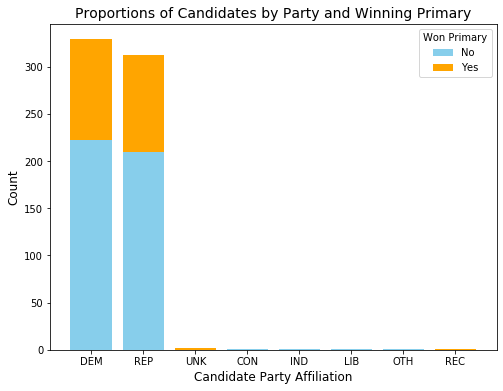

In [6]:
# Visualization 1 (Categorical)* 
# Democrat vs Republic
counts = total_df.groupby(['Cand_Party_Affiliation', 'Won Primary']).size().unstack(fill_value=0)
counts['Total'] = counts.sum(axis=1)
counts = counts.sort_values(by='Total', ascending=False)

# Create the stacked bar chart
plt.figure(figsize=(8, 6))
plt.bar(counts.index, counts['No'], label='No', color='skyblue') 
plt.bar(counts.index, counts['Yes'], bottom=counts['No'], label='Yes', color='orange')

# Add labels and title
plt.title('Proportions of Candidates by Party and Winning Primary', fontsize=14)
plt.xlabel('Candidate Party Affiliation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Won Primary', loc='upper right', fontsize=10)

There seems to be a similar number of Democratic and Republican candidates in the dataset to equally represent each party. The proportion of candidates winning a primary or not also seems to be approximately even between these two parties. This could suggest that party affiliation does not play a huge role in winning a primary, but rather, has more to do with other factors of each candidate. Therefore, this relates to our first research question regarding party affiliation and predicting whether or not a candidate won a primary.

### Visualization 2

Text(0, 0.5, 'Number of Candidates')

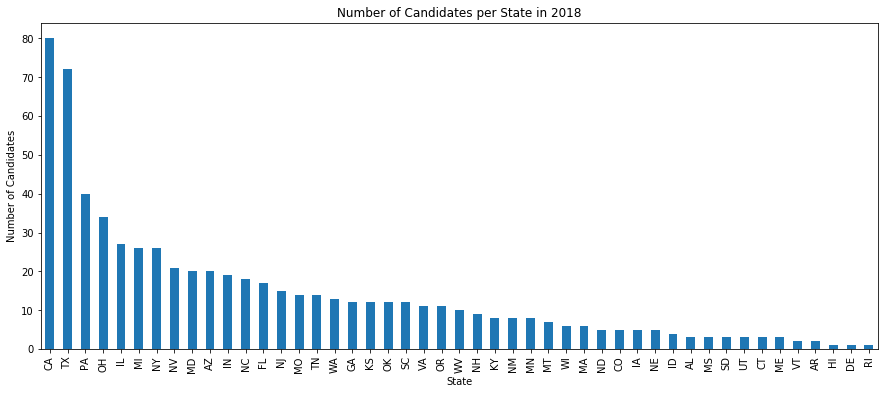

In [7]:
# Visualization 2 (Categorical)* 
# How many candidates in each state
state_counts = total_df["State"].value_counts()
state_counts.plot(kind="bar",figsize=(15, 6))
plt.title('Number of Candidates per State in 2018')
plt.xlabel('State')
plt.ylabel('Number of Candidates')

One thing that I notice is that state with the highest number of candidates is California followed by Texas. The states with higher populations tended to have higher number of candidates. Also, not all states are represented on this bar graph, there are 3 states that do not have candidates. 

This is relevant to our second research question: 'Does endorsement status (whether or not the candidate is endorsed) cause an increase in the lean of the district?' because for states with more candidates like California and Texas, it may be harder to decipher since there may be more confounding variables across all the candidates.



### Visualization 3

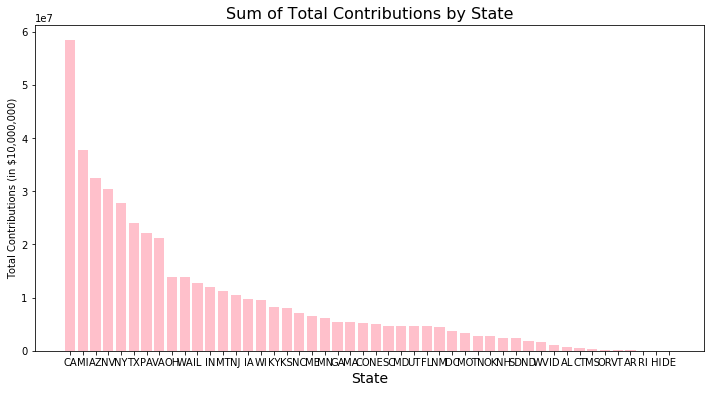

In [8]:
# Visualization 3 (Quantitative)* 
# Distribution of the total contributions

state_contributions = total_df.groupby('Cand_State')['Total_Contribution'].sum().reset_index()
state_contributions = state_contributions.sort_values(by='Total_Contribution', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(state_contributions['Cand_State'], state_contributions['Total_Contribution'], color='pink')
plt.title('Sum of Total Contributions by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Total Contributions (in $10,000,000)')
plt.show()


### Visualization 3.5

In [9]:
state_contributions = total_df.groupby('Cand_State')['Total_Contribution'].sum().reset_index()

top_states = state_contributions.sort_values(by='Total_Contribution', ascending=False).head(10)

# top 10 state contributors
state_contributions.head(10)

,Cand_State,Total_Contribution
0,AL,774586.70
1,AR,161619.27
2,AZ,32508767.32
3,CA,58375546.45
4,CO,5186609.26
5,CT,449937.35
6,DC,3700764.05
7,DE,0.00
8,FL,4670035.62
9,GA,5439747.73


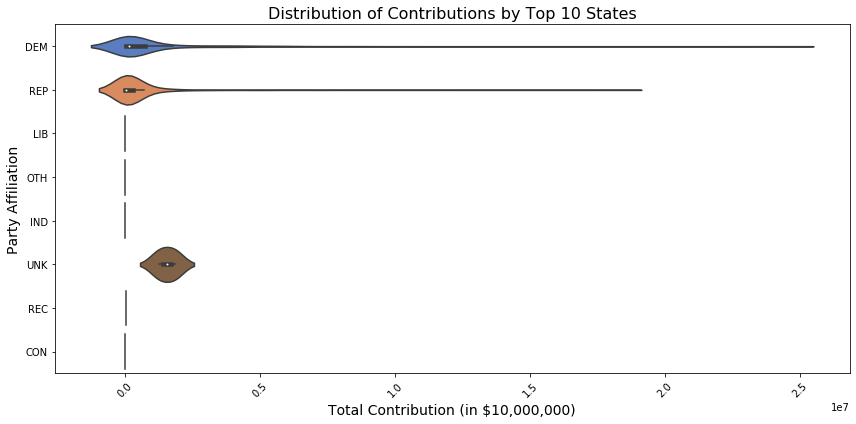

In [10]:
plt.figure(figsize=(12, 6))
sns.violinplot(
    y='Cand_Party_Affiliation', 
    x='Total_Contribution', 
    data=total_df, 
    palette='muted'
)
plt.title('Distribution of Contributions by Top 10 States', fontsize=16)
plt.xlabel('Total Contribution (in $10,000,000)', fontsize=14)
plt.ylabel('Party Affiliation', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Seeing the distribution of the contributions for each party suggests that the Democratic and Republican parties have more candidates that are receiving contributions compared to the other parties. This is also shown by the wide range of values in the violin plots for the two parties, whereas the other parties only have a distribution of zero. This relates to both research questions where we can see how the contributions are distributed across both party affiliation and state. This helps show the nuance in how contributions are divided between different candidates; we can take this into account when trying to predict whether they won the primary because we can see from the plot that the Democratic and Republican parties are the main parties that get contributions in general.

### Visualization 4

In [11]:
endorsed_cols = ['Party Support?', 'Emily Endorsed?', 'Biden Endorsed?', 'Warren Endorsed? ', 'Sanders Endorsed?', 'Our Revolution Endorsed?',
                 'Justice Dems Endorsed?', 'PCCC Endorsed?','Indivisible Endorsed?',
                'WFP Endorsed?', 'VoteVets Endorsed?', 'No Labels Support?',
                'Rep Party Support?', 'Trump Endorsed?', 'Bannon Endorsed?',
                'Great America Endorsed?', 'NRA Endorsed?', 'Right to Life Endorsed?',
                'Susan B. Anthony Endorsed?', 'Club for Growth Endorsed?',
                'Koch Support?', 'House Freedom Support?', 'Tea Party Endorsed?',
                'Main Street Endorsed?', 'Chamber Endorsed?']
endorsed = total_df[endorsed_cols]
endorsed = endorsed.replace({'No': 0,
                  'Yes': 1})
endorsed[~endorsed['Emily Endorsed?'].isna()]['Emily Endorsed?']

endorse = endorsed.sum(axis = 1)
endorse = endorse.mask(endorse >=1, 1)
total_df['Endorsed?'] = endorse


Text(0.5, 1, 'Distribution of Partisan Lean by Endorsement')

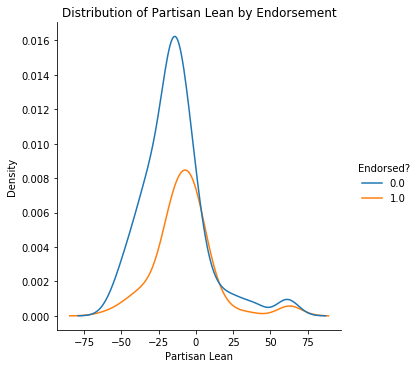

In [13]:
# Visualization 4 (Quantitative)* 
# Transer from other auth committee
sns.displot(data = total_df, x = 'Partisan Lean', hue = 'Endorsed?', kind='kde')
plt.title('Distribution of Partisan Lean by Endorsement')

The plot shows that being endorsed and not endorsed both have a similar mean below zero. However, we can still see how not being endorsed has a higher concentration around that mean. We also notice a slight increase in the density of partisan lean between values of 50 and 75. This relates to our second research question because this graph examines the two variables we are attempting to find a causal relationship between. From this graph, we can initially hypothesize that there may not be a causal relationship between endorsement and partisan lean.

### Visualization 5

Text(0.5, 1.0, 'Distribution of Support from Other Committees')

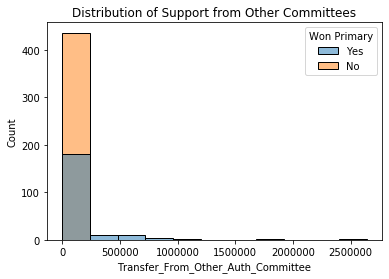

In [14]:
# Visualization 5 (Categorical)
sns.histplot(data = total_df, x = 'Transfer_From_Other_Auth_Committee', hue = 'Won Primary')
plt.title('Distribution of Support from Other Committees')

We can see that most people who did not win the primary election had no transfers from other committees, whereas the few people that did get transfers seem to have won the primary. This relates to the first research question in trying to predict whether they win the primary or not. It is still difficult to determine whether or not the candidate won because there is a reasonable amount of people who won the primary that did not get the transfer.

## <b>Research Question 1

### Q) How can we predict winning primary elections from campaign financing and primary election data?

### a) Nonparametric Method:

In [15]:
# 0 = Dem, 1 = Rep
temp_df = total_df[total_df['Cand_Party_Affiliation'].isin(["DEM", "REP"])]
temp_df['Cand_Party_Affiliation'] = temp_df['Cand_Party_Affiliation'].map({"DEM": 0, "REP": 1})
temp_df["General Status"] = temp_df["General Status"].map({"On the Ballot": 1})
temp_df["General Status"] = temp_df["General Status"].fillna(0)
temp_df["Primary Status"] = temp_df["Primary Status"].map({"Lost": 0, "Advanced": 1})
temp_df["Race"] = temp_df["Race"].map({"Nonwhite": 0, "White": 1}).fillna(0)
temp_df["Race Type"] = temp_df["Race Type"].map({"Regular": 0, "Special": 1})
temp_df["Partisan Lean"] = temp_df["Partisan Lean"].fillna(0)
temp_df = temp_df.fillna(0)
temp_df["Won Primary"] = temp_df['Won Primary'].map({"No": 0, "Yes": 1}).fillna(0)

X_cols = ['State', 'Race Type', 
        'Partisan Lean', 'Race', 'Total_Contribution', 'Cand_Party_Affiliation',
       'Endorsed?', 'Primary %','Primary Status']
X = temp_df[X_cols]
y = temp_df['Won Primary']


/Users/minookim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/minookim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/minookim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set 

In [16]:
# Split based off state population
def categorize(value):
    if value >= 20:  # Big -> 3
        return 3
    elif value >= 10:  # Medium -> 2
        return 2
    else:  # Small -> 1
        return 1

X['State'] = X['State'].replace(X['State'].value_counts().apply(categorize).to_dict())
X

/Users/minookim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,State,Race Type,Partisan Lean,Race,Total_Contribution,Cand_Party_Affiliation,Endorsed?,Primary %,Primary Status
0,1,0,-30.680000,0.0,46845.21,0,0.0,80.769997,1.0
1,1,0,-33.660000,1.0,440309.26,0,0.0,65.739998,1.0
2,1,0,-48.459999,1.0,287432.23,0,0.0,100.000000,1.0
3,1,0,-34.810001,0.0,137153.22,0,1.0,100.000000,1.0
4,1,0,-13.510000,0.0,24466.05,0,0.0,9.340000,0.0
...,...,...,...,...,...,...,...,...,...
652,1,0,0.000000,0.0,0.00,1,0.0,10.400000,0.0
653,1,0,0.000000,0.0,272317.76,1,1.0,100.000000,1.0
654,1,0,0.000000,0.0,0.00,1,0.0,55.600000,1.0
655,1,0,0.000000,0.0,5412468.20,1,1.0,49.000000,1.0


In [17]:
X_dt = X[['State', 'Race Type', 
        'Partisan Lean', 'Race', 'Total_Contribution', 'Cand_Party_Affiliation',
       'Endorsed?']]
X_train, X_test, y_train, y_test = train_test_split(X_dt, y, test_size=0.33, random_state=42)
train, test = train_test_split(temp_df, test_size=0.3, random_state=101)

print(X_train.shape, y_train.shape)


(435, 7) (435,)


Prediction using a Decision Tree:

In [18]:
tree_model = DecisionTreeRegressor()

tree_model.fit(X_train, y_train)

X_train["tree_pred"] = tree_model.predict(X_train)
X_test["tree_pred"] = tree_model.predict(X_test)

/Users/minookim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/minookim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
print(classification_report(y_test, X_test['tree_pred'].apply(round)))
train_rmse = np.mean((X_train["tree_pred"] - y_train) ** 2) ** 0.5
test_rmse = np.mean((X_test["tree_pred"] - y_test) ** 2) ** 0.5

print("Training set error for decision tree:", train_rmse)
print("Test set error for decision tree:", test_rmse)

              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84       152
         1.0       0.61      0.65      0.63        63

    accuracy                           0.78       215
   macro avg       0.73      0.74      0.74       215
weighted avg       0.78      0.78      0.78       215

Training set error for decision tree: 0.1652982830507728
Test set error for decision tree: 0.4718618514185885


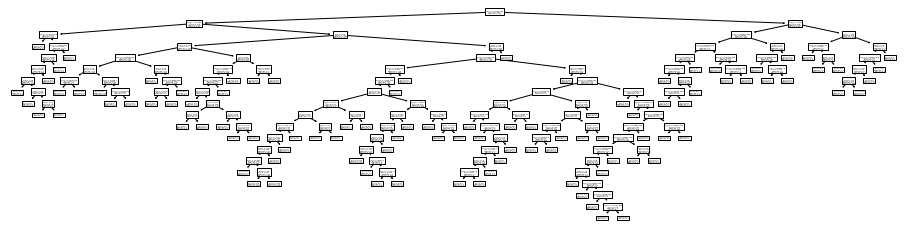

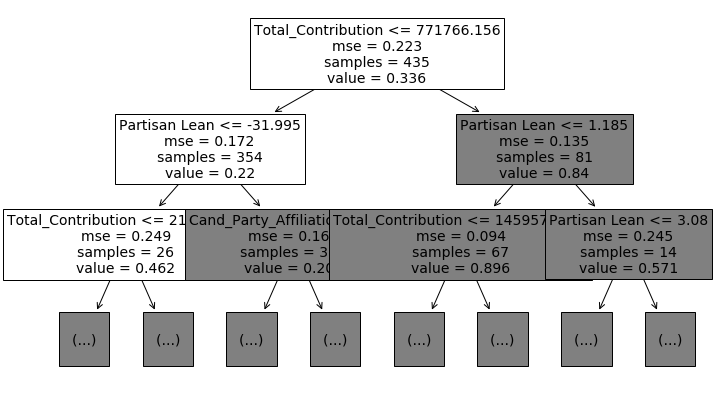

In [20]:
plt.figure(figsize=(16, 4))
plot_tree(tree_model);
# plot max depth
plt.figure(figsize=(12, 7))
plot_tree(tree_model, max_depth=2, fontsize=14, feature_names=X_cols);

### b) Frequentist Binomial GLM

In [23]:
# Model on training data (all valid features)
freq_model_train = sm.GLM(y_train, exog = sm.add_constant(X_train[['State', 'Race Type', 
        'Partisan Lean', 'Race', 'Cand_Party_Affiliation', 'Total_Contribution',
        'Endorsed?']]), #'Primary %','Primary Status',
                  family=sm.families.Binomial())
freq_res_train = freq_model_train.fit()
print(freq_res_train.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Won Primary   No. Observations:                  435
Model:                            GLM   Df Residuals:                      427
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -215.72
Date:                Mon, 16 Dec 2024   Deviance:                       431.43
Time:                        15:52:03   Pearson chi2:                 1.01e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2

In [24]:
# model on test data
freq_model_test = sm.GLM(y_test, exog = sm.add_constant(X_test[['State', 'Race Type',
        'Partisan Lean', 'Race', 'Cand_Party_Affiliation', 'Total_Contribution',
        'Endorsed?']]), #'Primary %',  Primary Status'
                  family=sm.families.Binomial())
freq_res_test = freq_model_test.fit()
print(freq_res_test.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Won Primary   No. Observations:                  215
Model:                            GLM   Df Residuals:                      207
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -90.104
Date:                Mon, 16 Dec 2024   Deviance:                       180.21
Time:                        15:52:04   Pearson chi2:                     247.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3

In [25]:
#model 1
model_1_aic_train = sm.tools.eval_measures.aic(freq_res_train.llf, 435, 7)
model_1_aic_test = sm.tools.eval_measures.aic(freq_res_test.llf, 215, 7)


In [26]:
#model 2: No binary features aside from party
freq_model_train_2 = sm.GLM(y_train, exog = sm.add_constant(X_train[['State',
        'Partisan Lean', 'Cand_Party_Affiliation', 'Total_Contribution'
        ]]), #'Primary %','Primary Status',
                  family=sm.families.Binomial())
freq_res_train_2 = freq_model_train_2.fit()
print(freq_res_train_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Won Primary   No. Observations:                  435
Model:                            GLM   Df Residuals:                      430
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -217.32
Date:                Mon, 16 Dec 2024   Deviance:                       434.64
Time:                        15:52:07   Pearson chi2:                 1.41e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2

In [27]:
# model 2: No binary features + party
freq_model_test_2 = sm.GLM(y_test, exog = sm.add_constant(X_test[[
        'Partisan Lean', 'Cand_Party_Affiliation', 'Total_Contribution',
        ]]), #'Primary %',  Primary Status'
                  family=sm.families.Binomial())
freq_res_test_2 = freq_model_test_2.fit()
print(freq_res_test_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Won Primary   No. Observations:                  215
Model:                            GLM   Df Residuals:                      211
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -92.253
Date:                Mon, 16 Dec 2024   Deviance:                       184.51
Time:                        15:52:08   Pearson chi2:                     239.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3

In [28]:
#model 2
model_2_aic_train = sm.tools.eval_measures.aic(freq_res_train_2.llf, 435, 3)
model_2_aic_test = sm.tools.eval_measures.aic(freq_res_test_2.llf, 215, 3)

In [29]:
#model 3: Less Features (Removing features with imputations)
freq_model_train_3 = sm.GLM(y_train, exog = sm.add_constant(X_train[['State', 'Race Type', 'Cand_Party_Affiliation', 'Total_Contribution',
        'Endorsed?']]), #'Primary %','Primary Status',
                  family=sm.families.Binomial())
freq_res_train_3 = freq_model_train_3.fit()
print(freq_res_train_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Won Primary   No. Observations:                  435
Model:                            GLM   Df Residuals:                      429
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -220.86
Date:                Mon, 16 Dec 2024   Deviance:                       441.71
Time:                        15:52:10   Pearson chi2:                     822.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1

In [30]:
freq_model_test_3 = sm.GLM(y_test, exog = sm.add_constant(X_test[['State', 'Race Type', 'Cand_Party_Affiliation', 'Total_Contribution',
        'Endorsed?']]), #'Primary %',  Primary Status'
                  family=sm.families.Binomial())
freq_res_test_3 = freq_model_test_3.fit()
print(freq_res_test_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Won Primary   No. Observations:                  215
Model:                            GLM   Df Residuals:                      209
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -100.62
Date:                Mon, 16 Dec 2024   Deviance:                       201.24
Time:                        15:52:12   Pearson chi2:                     210.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1

In [31]:
#model 3
model_3_aic_train = sm.tools.eval_measures.aic(freq_res_train_3.llf, 435, 5)
model_3_aic_test = sm.tools.eval_measures.aic(freq_res_test_3.llf, 215, 5)

In [35]:
print('AIC for Model 1: ', model_1_aic_train)
print('AIC for Model 2: ', model_2_aic_train)
print('AIC for Model 3: ', model_3_aic_train)

AIC for Model 1:  445.4325898310659
AIC for Model 2:  440.6365179957926
AIC for Model 3:  451.7107511201242


Based on the AIC values, we choose the lowest AIC model, which is model 2.

In [40]:
y_pred_prob_train_2 = freq_res_train_2.predict(sm.add_constant(X_train[['State', 'Partisan Lean', 'Cand_Party_Affiliation', 'Total_Contribution']]))
print('RMSE for Model 2 Training Data: ', sm.tools.eval_measures.rmse(y_train, y_pred_prob_train_2))

RMSE for Model 2 Training Data:  0.3976183622810819


In [41]:
#based on AIC chose model 2
y_pred_prob_test_2 = freq_res_test_2.predict(sm.add_constant(X_test[['Partisan Lean', 'Cand_Party_Affiliation', 'Total_Contribution']]))
print('RMSE for Model 2 Test Data: ', sm.tools.eval_measures.rmse(y_test, y_pred_prob_test_2))

RMSE for Model 2 Test Data:  0.36748866974152944


# <b>Research Question 2: Causal Inference

### Q) Does endorsement status (whether or not the candidate is endorsed) cause an increase in the percentage of primary votes a candidate receives?

Use transformed data from before:

In [42]:
causal_df = X
causal_df.head()

,State,Race Type,Partisan Lean,Race,Total_Contribution,Cand_Party_Affiliation,Endorsed?,Primary %,Primary Status
0,1,0,-30.680000,0.0,46845.21,0,0.0,80.769997,1.0
1,1,0,-33.660000,1.0,440309.26,0,0.0,65.739998,1.0
2,1,0,-48.459999,1.0,287432.23,0,0.0,100.000000,1.0
3,1,0,-34.810001,0.0,137153.22,0,1.0,100.000000,1.0
4,1,0,-13.510000,0.0,24466.05,0,0.0,9.340000,0.0


Visualization to analyze relationship between treatment and outcome variables.

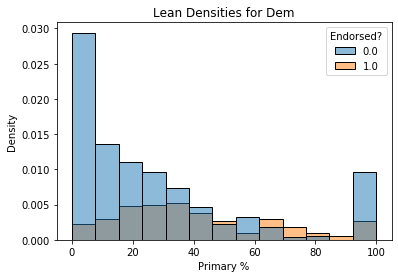

In [44]:
sns.histplot(data=causal_df, x='Primary %', hue='Endorsed?', stat='density')
plt.title("Lean Densities for Dem");

Visualization to analyze confounding variables such as total contributions.

/Users/minookim/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/minookim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


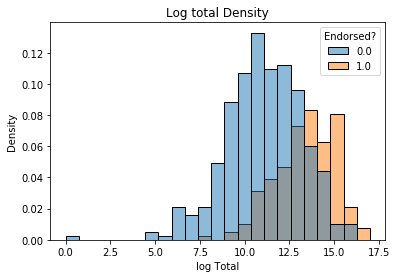

In [45]:
causal_df['log Total'] = np.log(causal_df['Total_Contribution'])
sns.histplot(data=causal_df, x='log Total', hue='Endorsed?', stat='density')
plt.title("Log total Density");

<b>Calculate Propensity Scores:</b>

Fit Logistic Regression model to calculate propensity scores. In order to do this we need to get the probability of getting the treatment given the covariates.

In [73]:
treatment = causal_df['Endorsed?']
covariates = causal_df[['State', 'Race Type', 'Partisan Lean', 'Race', 'Total_Contribution', 'Cand_Party_Affiliation', 'Primary Status']] 

# fit logistic regression model
model = LogisticRegression()
model.fit(covariates, treatment)

# Calculate propensity scores (probability of treatment)
causal_df['pscore'] = model.predict_proba(covariates)[:, 1]

causal_df.head()



/Users/minookim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,State,Race Type,Partisan Lean,Race,Total_Contribution,Cand_Party_Affiliation,Endorsed?,Primary %,Primary Status,log Total,pscore
0,1,0,-30.680000,0.0,46845.21,0,0.0,80.769997,1.0,10.754604,0.502743
1,1,0,-33.660000,1.0,440309.26,0,0.0,65.739998,1.0,12.995233,0.525764
2,1,0,-48.459999,1.0,287432.23,0,0.0,100.000000,1.0,12.568742,0.516827
3,1,0,-34.810001,0.0,137153.22,0,1.0,100.000000,1.0,11.828854,0.508032
4,1,0,-13.510000,0.0,24466.05,0,0.0,9.340000,0.0,10.105042,0.501433


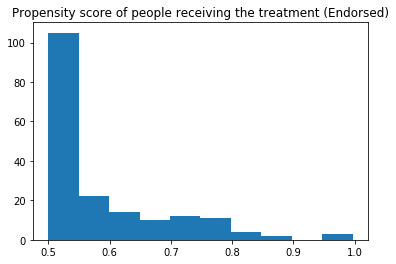

In [74]:
plt.hist(causal_df[causal_df['Endorsed?'] == 1]['pscore']);
plt.title("Propensity score of people receiving the treatment (Endorsed)");

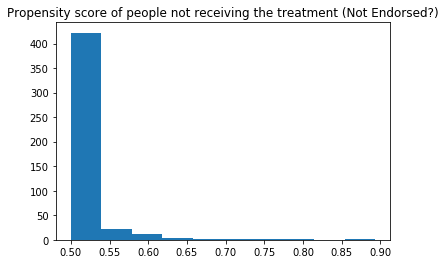

In [75]:
plt.hist(causal_df[causal_df['Endorsed?'] == 0]['pscore']);
plt.title("Propensity score of people not receiving the treatment (Not Endorsed?)");

We notice that all propensity scores are above 0.5 which may indicate a dominating confounding variable.

### Implement Inverse Propensity Weighting

Use IPW equation:
$$
\hat{\tau}_{IPW} =
    \frac{1}{n}
    \underbrace{%
         \sum_{i: Z_i = 1} \frac{Y_i}{e(X_i)}
    }_{\text{reweighted treated rows}}
    -
    \frac{1}{n}
    \underbrace{%
        \sum_{i: Z_i = 0} \frac{Y_i}{1-e(X_i)}
    }_{\text{reweighted control rows}}
$$
and get IPW estimate to see the ATE

In [76]:
# Inverse Propensity Weighting
treated_rows = np.sum(causal_df[causal_df['Endorsed?'] == 1]['Primary %'] / causal_df[causal_df['Endorsed?'] == 1].pscore)
untreated_rows = np.sum(causal_df[causal_df['Endorsed?'] == 0]['Primary %'] / (1-causal_df[causal_df['Endorsed?'] == 0].pscore))
n = causal_df.shape[0]
ipw_estimate = 1 / n * treated_rows - 1 / n * untreated_rows
ipw_estimate

-23.76888741274447

Trim propensity scores as we notice in the graphs above that there are some scores above 0.9 in order to reduce some variability.

In [77]:
# Trimming our propensities

obs_prop2 = causal_df[(causal_df['pscore'] >= 0.1) & (causal_df['pscore'] <= 0.9)]

treated_rows = np.sum(obs_prop2[obs_prop2['Endorsed?'] == 1]['Primary %'] / obs_prop2[obs_prop2['Endorsed?'] == 1].pscore)
untreated_rows = np.sum(obs_prop2[obs_prop2['Endorsed?'] == 0]['Primary %'] / (1-obs_prop2[obs_prop2['Endorsed?'] == 0].pscore))
n = obs_prop2.shape[0]
trimmed_ipw_estimate = 1 / n * treated_rows - 1 / n * untreated_rows
trimmed_ipw_estimate

# no need to trim our propensity scores as most scores are between 0.1 and 0.9

-24.171022099222235

<b>Conclusion:</b> Being endorsed causes a decrease in primary vote percentage by 23.77%.